# Prediction Using Unsupervised ML (Iris Dataset)

# K Means Clustering

**Name: Prashanth B**

The Iris Dataset contains four features (length and width of sepals and petals) of
50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).
These measures were used to create a linear discriminant model to classify the species.
The dataset is often used in data mining, classification and clustering examples and
to test algorithms

Download the data from the UCI Machine Learning Repository -- Iris Data Set

IMPORT ALL THE RELEVANT LIBRARIES REQUIRED

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

LOAD DATA

In [ ]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


EXPLORATORY DATA ANALYSIS

In [ ]:
data.shape

(150, 6)

In [ ]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


HANDLING WITH MISSING VALUES

In [ ]:
data.isnull().values.any()

False

In [ ]:
data.select_dtypes(include = 'object').columns

Index(['Species'], dtype='object')

In [ ]:
x = data.drop(columns=['Species'])
x.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


FEATURE SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
x

array([[-1.72054204e+00, -9.00681170e-01,  1.03205722e+00,
        -1.34127240e+00, -1.31297673e+00],
       [-1.69744751e+00, -1.14301691e+00, -1.24957601e-01,
        -1.34127240e+00, -1.31297673e+00],
       [-1.67435299e+00, -1.38535265e+00,  3.37848329e-01,
        -1.39813811e+00, -1.31297673e+00],
       [-1.65125846e+00, -1.50652052e+00,  1.06445364e-01,
        -1.28440670e+00, -1.31297673e+00],
       [-1.62816394e+00, -1.02184904e+00,  1.26346019e+00,
        -1.34127240e+00, -1.31297673e+00],
       [-1.60506942e+00, -5.37177559e-01,  1.95766909e+00,
        -1.17067529e+00, -1.05003079e+00],
       [-1.58197489e+00, -1.50652052e+00,  8.00654259e-01,
        -1.34127240e+00, -1.18150376e+00],
       [-1.55888037e+00, -1.02184904e+00,  8.00654259e-01,
        -1.28440670e+00, -1.31297673e+00],
       [-1.53578584e+00, -1.74885626e+00, -3.56360566e-01,
        -1.34127240e+00, -1.31297673e+00],
       [-1.51269132e+00, -1.14301691e+00,  1.06445364e-01,
        -1.28440670e+00

In [ ]:
x.shape

(150, 5)

ELBOW METHOD

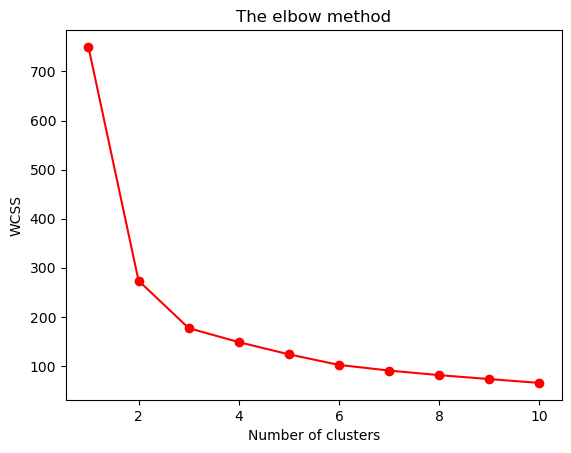

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph,
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss, 'ro-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

TRAINING MODEL

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)

In [ ]:
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

VISUALIZE CLUSTERS

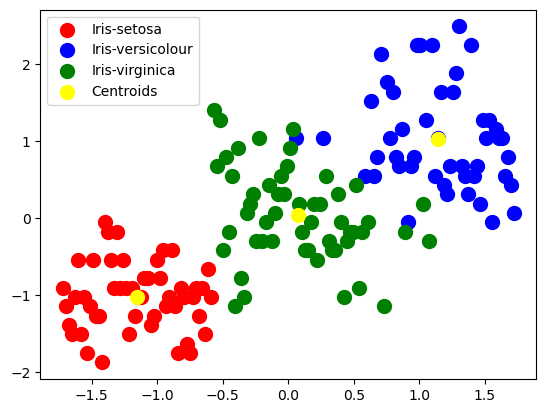

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

**Thank you**